# Challenge $0$


## 1. ***Data cleaning with Pandas***

Use the library `pandas` to load and clean the required dataset.

In [83]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os


Obtain the data file

In [84]:
FFILE = './50_Startups.csv'
if os.path.isfile(FFILE): 
    print("File already exists")
    if os.access(FFILE, os.R_OK):
        print ("File is readable")
    else:
        print ("File is not readable, removing it and downloading again")
        !rm FFILE
        !wget "https://raw.github.com/alexdepremia/ML_IADA_UTs/main/challenge_0/50_Startups.csv"
else:
    print("Either the file is missing or not readable, download it")
    !wget "https://raw.github.com/alexdepremia/ML_IADA_UTs/main/challenge_0/50_Startups.csv"

File already exists
File is readable


In [85]:
# load the dataset using pandas
data = pd.read_csv('50_Startups.csv')
# extract data feature matrix and labels
X = data.iloc[:,:-2].values 
y = data.iloc[:,3].values
df = pd.DataFrame(data)

In [86]:
y

array(['New York', 'California', 'Florida', 'New York', 'Florida',
       'New York', 'California', 'Florida', 'New York', 'California',
       'Florida', 'California', 'Florida', 'California', 'Florida',
       'New York', 'California', 'New York', 'Florida', 'New York',
       'California', 'New York', 'Florida', 'Florida', 'New York',
       'California', 'Florida', 'New York', 'Florida', 'New York',
       'Florida', 'New York', 'California', 'Florida', 'California',
       'New York', 'Florida', 'California', 'New York', 'California',
       'California', 'Florida', 'California', 'New York', 'California',
       'New York', 'Florida', 'California', 'New York', 'California'],
      dtype=object)

***Play with data***

In [87]:
df.shape

(50, 5)

In [88]:
df.replace(to_replace = 0.00, value = df.mean(axis=0), inplace=True)  # inject the mean of the column when value is 0
df.head() 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


***Select two categories for binary classification*** 

In [89]:
df_sel=df[(df.State=="California") | (df.State=="Florida")]

In [90]:
df_sel.head() # column title and first rows of the dataset

,R&D Spend,Administration,Marketing Spend,State,Profit
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
4,142107.34,91391.77,366168.42,Florida,166187.94
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60


In [91]:
df_sel.dtypes # type of each column  

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

***Encode categorical data*** 

One-hot encoding of categorical feature _State_

In [92]:
df_one = pd.get_dummies(df_sel["State"])

In [93]:
df_one.head()

,California,Florida
1,1,0
2,0,1
4,0,1
6,1,0
7,0,1


In [94]:
# construct the final dataset that you will use for learning and prediction
df_fin = pd.concat((df_one, df_sel), axis=1)
df_fin = df_fin.drop(["Florida"], axis=1)
df_fin = df_fin.drop(["State"], axis=1)
# California is class 1, Florida is class 0
df_fin = df_fin.rename(columns={"California": "State"})
df_fin.head()

,State,R&D Spend,Administration,Marketing Spend,Profit
1,1,162597.70,151377.59,443898.53,191792.06
2,0,153441.51,101145.55,407934.54,191050.39
4,0,142107.34,91391.77,366168.42,166187.94
6,1,134615.46,147198.87,127716.82,156122.51
7,0,130298.13,145530.06,323876.68,155752.60


***Normalize***

Divide by the absolute value of the maximum so that features are in \[0, 1\]

In [95]:
def absolute_maximum_scale(series):
    return series / series.abs().max()

for col in df_fin.columns:
    df_fin[col] = absolute_maximum_scale(df_fin[col])

In [96]:
df_fin.head()

,State,R&D Spend,Administration,Marketing Spend,Profit
1,1.0,1.000000,0.828805,1.000000,1.000000
2,0.0,0.943688,0.553781,0.918982,0.996133
4,0.0,0.873981,0.500378,0.824892,0.866501
6,1.0,0.827905,0.805926,0.287716,0.814020
7,0.0,0.801353,0.796789,0.729619,0.812091


***Classification***

Prepare the dataset:

In [97]:
y = df_fin["State"] # ground truth labels
X = df_fin.drop(["State"], axis=1) # datapoints features
# extract actual values from series
y = y.values
X = X.values

Train test split

$75\%$ of the data are in the training set, the remaining $25\%$ constitutes the test set.

In [98]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.25, random_state=0)

Train the Logistic Regression Model

In [99]:
from sklearn.linear_model import LogisticRegression

In [100]:
LR = LogisticRegression(random_state=0, solver='lbfgs').fit(X_train, y_train)
LR.predict(X_test)
round(LR.score(X_test,y_test), 4)

0.3333

***Plot results***

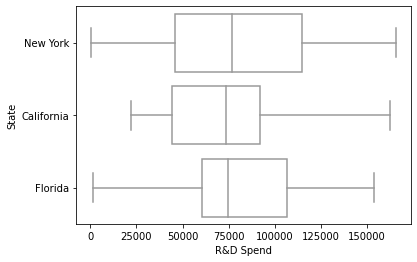

In [101]:
import seaborn as sns
sns.boxplot(data=df, x='R&D Spend', y = 'State', color='white')
plt.show()

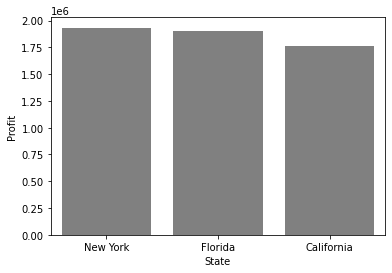

In [102]:
us_cat_profit = df.groupby('State', as_index=False)['Profit'].sum().sort_values('Profit', ascending = False)
sns.barplot(x = 'State', y = 'Profit', data=us_cat_profit, color='grey')
plt.show()

***Add regularization***

Implement from scratch the regularized logistic regression model (with all the regularization techniques seen during the course). 

In [103]:
#RIDGE

import numpy.linalg as LA

def sigmoidM(X, w):
    """
    Parameters
    ----------
    X : array of dim n x d 
        Matrix containing the dataset
    w : array of dim d
        Vector representing the coefficients of the logistic model
    """
    h = 1/(1+np.exp(-np.matmul(X,w)))
    return h


def RidgeLogisticLoss(X, y, w, lam):
    """
    Parameters
    ----------
    X : array of dim n x d
        Matrix containing the dataset
    y : array of dim n
        Vector representing the ground truth label of each data point
    w : array of dim d
        Vector representing the coefficients of the logistic model
    """
    n = np.shape(X)[0]
    cost = -(1/n)*np.sum(y*np.log(sigmoidM(X,w)) + (1-y)*np.log(1-sigmoidM(X,w))) + (1/n)*lam*LA.norm(w,2)
    return cost

def RidgeGradient(w, lam, points):
    return ((1/points)*2*lam*w)

def LogisticGradient(X,y,w, points):
    d = np.shape(X)
    return (1/points)*(np.transpose(X)@(sigmoidM(X,w)-y))

    
def GDRidge(X, y, iter, gamma, lam, points):
    """
    Parameters
    ----------
    X : array of float dim n x d
        Matrix containing the dataset
    y : array of float of dim n
        Vector containing the ground truth value of each data point
    iter : int
        Number of GD iterations
    gamma : float
        Learning rate
    lam : float
        Weight of the L2 penalty term
    points : int
        Number of points in our dataset

    """
    d = np.shape(X)[1]
    W = np.zeros((d,iter)) #matrice pesi
    L = np.zeros(iter) #vettore loss
    w = np.random.normal(0,0.1,d)
    #w = np.zeros(d)
    for i in range(iter):
        W[:,i] = w
        w = w - 2*gamma*(LogisticGradient(X, y, w, points) + RidgeGradient(w, lam, points))
        L[i] = RidgeLogisticLoss(X,y,w,lam)
    return W, L


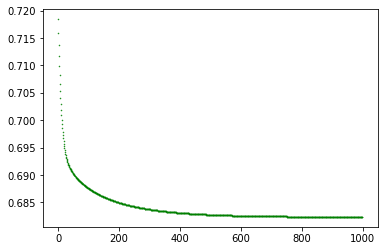

In [104]:
points=np.shape(X)[0]
w_trial,l_trial = GDRidge(X_train,y_train,1000,0.1,0.4,points)


fig, ax = plt.subplots()
ax.plot(l_trial, 'go', markersize=0.5)
fig.show()

In [105]:
#LASSO

def LassoLogisticLoss(X,y,w,lam):
    """
    Parameters
    ----------
    X : array of dim n x d
        Matrix containing the dataset
    y : array of dim n
        Vector representing the ground truth label of each data point
    w : array of dim d
        Vector representing the coefficients of the logistic model
    """
    
    n = np.shape(X)[0]
    L = -(1/n)*np.sum(y*np.log(sigmoidM(X,w)) + (1-y)*np.log(1-sigmoidM(X,w))) + (1/n)*lam*LA.norm(w,1)
    return L

def L1_subgradient(z):
    g = np.ones(z.shape)
    g[z < 0.] = -1.0
    return g

def LassoGradient(w, lam, points):
    return (lam * L1_subgradient(w))/points
    
def GDLasso(X, y, iter, gamma, d, lam):
    """
    Parameters
    ----------
    X : array of float dim n x d
        Matrix containing the dataset
    y : array of float of dim n
        Vector containing the ground truth value of each data point
    iter : int
        Number of GD iterations
    gamma : float
        Learning rate
    points : int
        Number of points in our dataset
    lam : float
        Weight of the L1 penalty term
    """
    W = np.zeros((d,iter))
    L = np.zeros(iter)
    w = np.zeros(d)
    for i in range(iter):
        W[:,i] = w
        w = w - 2*gamma*(LogisticGradient(X, y, w, points) + LassoGradient(w, lam, points))
        L[i] = LassoLogisticLoss(X,y,w,lam)
    return W, L

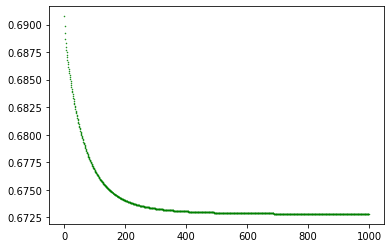

In [106]:
points = np.shape(X)[1]
w_trial,l_trial = GDLasso(X_train,y_train,1000,0.1,points,0.2)


fig, ax = plt.subplots()
ax.plot(l_trial, 'go', markersize=0.5)
fig.show()

In [107]:
#ELASTIC NET

def ElasticLogisticLoss(X,y,w,lam,alpha):
    n = np.shape(X)[0]
    L = -(1/n)*np.sum(y*np.log(sigmoidM(X,w)) + (1-y)*np.log(1-sigmoidM(X,w)))
    penaltyl1 = LA.norm(w,1)/n
    penaltyl2 = LA.norm(w,2)/n
    cost = L + lam*(alpha*penaltyl1 +(1-alpha)*penaltyl2)
    return cost

def ElasticGradient(w, lam,alpha,points):
    return alpha*LassoGradient(w,lam,points)+(1-alpha)*RidgeGradient(w,lam,points)

def ElasticGDLogistic(X, y, iter, gamma,lam,alpha): 
    """
    Parameters
    ----------
    X : array of dim n x d
        Matrix containing the dataset
    y : array of dim n
        Vector representing the ground truth label of each data point
    iter : int
        Number of GD iterations
    gamma : float
        Learning rate
    lam : float
        Weight of the L2 penalty term
    """
    d = np.shape(X)
    L = np.zeros(iter)
    w = np.zeros(d[1])
    W = np.zeros((d[1],iter))
    for i in range(iter):
        W[:,i] = w
        w = w-2*gamma*(LogisticGradient(X,y,w,d[0]) + ElasticGradient(w, lam, alpha, d[0]))
        L[i] = ElasticLogisticLoss(X,y,w,lam,alpha)
    return W,L 


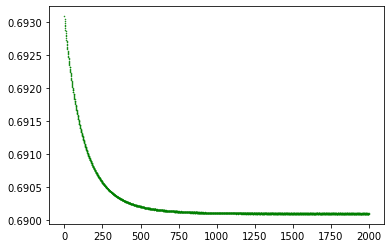

In [108]:
w_trial,l_trial = ElasticGDLogistic(X, y, 2000, 0.1, 0.4, 0.5)


fig, ax = plt.subplots()
ax.plot(l_trial, 'go', markersize=0.5)
fig.show()

***Model assessment***

Given true and predicted values, compute the most common classification metrics to assess the quality of your predictions. 

In [109]:
from sklearn.metrics import classification_report
y_true = y_test
y_pred = LR.predict(X_test)

target_names = ['California', 'Florida']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

  California       0.33      1.00      0.50         3
     Florida       0.00      0.00      0.00         6

    accuracy                           0.33         9
   macro avg       0.17      0.50      0.25         9
weighted avg       0.11      0.33      0.17         9



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Repeat the previous task for regularized logistic regression and compare the results. 

In [110]:
wR,cR = GDRidge(X_train,y_train,1000,0.1,0.4,33)
print(wR)
pesiR = wR[:,-1]
previsioniR = sigmoidM(X_test,pesiR)

yR_true = y_test 
yR_pred = np.round(previsioniR)

target_names = ['California', 'Florida']
print(classification_report(yR_true, yR_pred, target_names=target_names))

[[-2.94676394e-03 -1.35617554e-03  2.65998044e-04 ...  4.24086231e-01
   4.24096707e-01  4.24107126e-01]
 [-5.87758660e-02 -5.82928735e-02 -5.77638221e-02 ...  1.52935662e-01
   1.52938381e-01  1.52941084e-01]
 [-6.02497271e-02 -6.37868967e-02 -6.72614193e-02 ... -5.15593416e-01
  -5.15599168e-01 -5.15604884e-01]
 [-5.76404173e-02 -5.98320396e-02 -6.19647800e-02 ... -3.08512797e-01
  -3.08519560e-01 -3.08526288e-01]]
              precision    recall  f1-score   support

  California       0.38      1.00      0.55         3
     Florida       1.00      0.17      0.29         6

    accuracy                           0.44         9
   macro avg       0.69      0.58      0.42         9
weighted avg       0.79      0.44      0.37         9



In [111]:
wL,cL = GDLasso(X_train,y_train,500,0.1,4,0.4)
wL
pesiL = wL[:,-1]
previsioniL = sigmoidM(X_test,pesiL) 
yL_true = y_test 
yL_pred = np.round(previsioniL)

target_names = ['California', 'Florida']
print(classification_report(yL_true, yL_pred, target_names=target_names))

              precision    recall  f1-score   support

  California       0.38      1.00      0.55         3
     Florida       1.00      0.17      0.29         6

    accuracy                           0.44         9
   macro avg       0.69      0.58      0.42         9
weighted avg       0.79      0.44      0.37         9



In [112]:
wEN,cEN = ElasticGDLogistic(X_train,y_train,2000,0.1,0.4,0.5)
pesiEN = wEN[:,-1]
previsioniEN = sigmoidM(X_test,pesiEN)

yEN_true = y_test 
yEN_pred = np.round(previsioniEN)

target_names = ['California', 'Florida']
print(classification_report(yEN_true, yEN_pred, target_names=target_names))

              precision    recall  f1-score   support

  California       0.38      1.00      0.55         3
     Florida       1.00      0.17      0.29         6

    accuracy                           0.44         9
   macro avg       0.69      0.58      0.42         9
weighted avg       0.79      0.44      0.37         9



***ROC curve***

Implement a function for producing the Receiver Operating Characteristic (ROC) curve.

Given true and predicted values, plot the ROC curve using your implemented function.

In [113]:
def perf_metrics(y_actual, y_hat,threshold):
 
    tp = 0 #true positive
    fp = 0 #false positive
    tn = 0 #true negative
    fn = 0 #false negative
    
    for i in range(len(y_hat)): 
        if(y_hat[i][1] >= threshold):
            if(y_actual[i] == 1):
                tp += 1
            else:
                fp += 1
        elif(y_hat[i][1] < threshold):
            if(y_actual[i] == 0):
                tn += 1
            else:
                fn += 1
    
    #True positive rate and False positive rate
            
    tpr = tp/(tp+fn)
    fpr = fp/(tn+fp)

    return [fpr,tpr]



In [114]:
preds_p = LR.predict_proba(X_test)
fpr,tpr = perf_metrics(y_true,preds_p,0.5)
#Print Sensitivity and Specificity
print('Sensitivity: {} ,'.format(round(tpr,2)),'Specificity: {}'.format(round(1-fpr,2)))

Sensitivity: 0.0 , Specificity: 1.0


In [115]:
#FPR and TPR for different thresholds
#AUC and ROC

i = 0.4

thresholds = []
for k in range(200):
    i = i+0.001
    thresholds.append(i)

In [116]:
roc_points = []
for threshold in thresholds:
    rates = perf_metrics(y_true, preds_p, threshold)
    roc_points.append(rates)

In [117]:
fpr_array = []
tpr_array = []
for i in range(len(roc_points)-1):
    point1 = roc_points[i];
    point2 = roc_points[i+1]
    tpr_array.append([point1[0], point2[0]])
    fpr_array.append([point1[1], point2[1]])


In [118]:
#We use Trapezoidal rule to calculate the area under the curve and approximating the integral  
auc = sum(np.trapz(tpr_array,fpr_array))+1
print('AUC = {}'.format(auc))

AUC = 0.33333333333333326


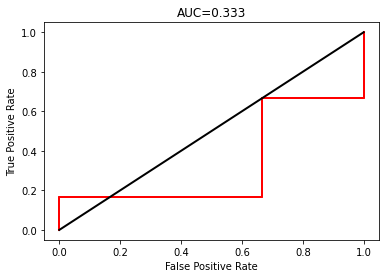

In [119]:
plt.plot(tpr_array,fpr_array, 'r', lw=2)
plt.plot([0, 1], [0, 1], 'k-', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC={}'.format(round(auc,3)))
plt.show()